Importes that you might need are given below

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

# The Harmonic Oscillator

Start with one dimensional harmonic trap: $V=\frac{1}{2}m\omega^2 x^2$

**Simulation details:**

Number of particles: 1.

Initial position: x = 5 Angstrom.

Initial momenta: Zero.

Nsteps = 10000.

trap frequency, $\hbar\omega = 50 meV$

**Questions \& Figures**


1. Figure 1: Plot the change in the total energy with respect to t=0 (in precent) vs. time for different values of dt.
What is the largest dt you can use so that the energy is conserved better than 0.1% of its initial value?
1. Figure 2: Plot the position of the particle vs. time. Explain the observed dynamics.
1. Figure 3: Plot the potential and kinteic energies vs. time.
1. Figure 4: Plot the histogram of the position of the particle.
1. Figure 5: Plot the histogram of the momenta of the particle.
Explain the shape of the histograms in Figures 4-5. How do you excpect them to change in the canonical ensemble?


### calc E(0) 

In [35]:
mass = 6.633E-26
omega = 7.596E13
posX = 5E-10
print(str(0.5 * (posX * omega) ** 2 * mass * 1.602E19) + " [eV]")

766.39459670532 [eV]


## figure 1

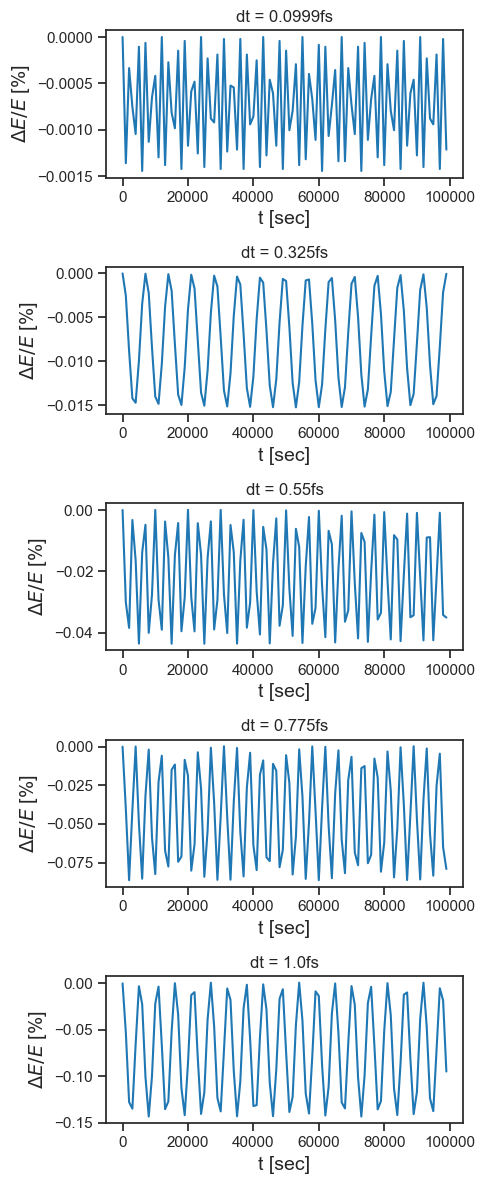

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')


# just an example, you can do somthing else
fig, ax = plt.subplots(5,1,figsize=(5,12))
for i, dt in enumerate(np.linspace(0.1E-15, 0.1E-14, 5)):
    df = pd.read_csv("simForFig1_" + str(i) + ".log", sep='\s+')
    ax[i].plot(df["step"].values, (df["E"].values - df['E'].values[0]) * 100/ df['E'].values[0])
    ax[i].set_title("dt = " + str(dt * 1E15)[:6] + "fs")
    ax[i].set_xlabel('t [sec]')
    ax[i].set_ylabel(r'$\Delta E/E$ [%]')



plt.tight_layout()


### $\Delta E/E$ [%] to dt

8.333333333333334e-16


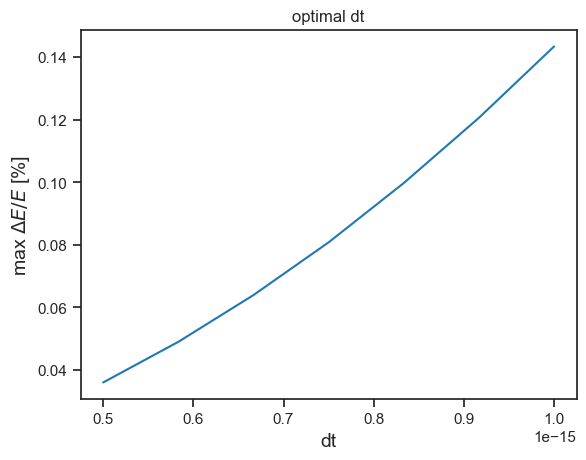

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

maxDiff_lst = []
prevDt = 0
found = False
for i, dt in enumerate(np.linspace(0.5E-15, 1E-15, 7)):
    df = pd.read_csv("simForFigDt_" + str(i) + ".log", sep='\s+')
    maxDiff = max(abs((df["E"].values - df['E'].values[0]) * 100/ df['E'].values[0]))
    #print(maxDiff)
    if maxDiff >= 0.1 and not found:
        print(prevDt)
        found = True
    maxDiff_lst.append(maxDiff)
    prevDt = dt

plt.title("optimal dt")
plt.xlabel('dt [Hz]')
plt.ylabel(r'max $\Delta E/E$ [%]')
plt.plot(np.linspace(0.5E-15, 1E-15, 7), maxDiff_lst)



## figure 2

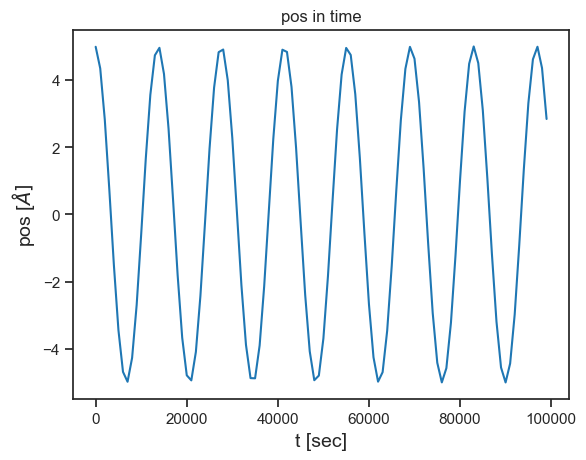

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForFig2.xyz", 'r')
# N = int(xyz.readline())
# header = xyz.readline()
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    if(count % 3 == 0):
        #print(i)
        pass
    elif(count % 3 == 1):
        #print(i)
        line = i.split()
        time.append(int(line[1]))
    else:
        line = i.split()
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

# print(time)
# print(posX)
# print(len(time))
# print(len(posX))
plt.title("pos in time")
plt.xlabel('t [sec]')
plt.ylabel(r"pos [$\AA ]$")
plt.plot(time, posX)    


## figure 3

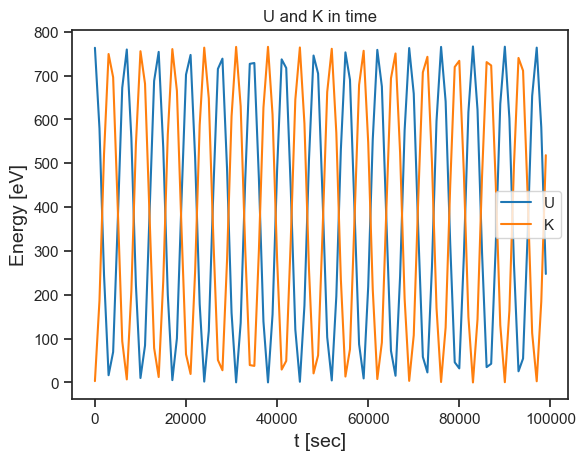

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simForFig3.log", sep='\s+')
plt.title("U and K in time")
plt.xlabel('t [sec]')
plt.ylabel(r"Energy [eV]")
plt.plot(df['step'], df['U'] * 1.602E19, label="U")
plt.plot(df['step'], df['K'] * 1.602E19, label="K")
plt.legend()

## figure 4

(array([12.,  6.,  4.,  4.,  2.,  4.,  2.,  4.,  2.,  2.,  2.,  4.,  2.,
         2.,  2.,  4.,  2.,  2.,  4.,  3.,  4.,  4.,  4.,  5., 14.]),
 array([-4.99812  , -4.5981974, -4.1982748, -3.7983522, -3.3984296,
        -2.998507 , -2.5985844, -2.1986618, -1.7987392, -1.3988166,
        -0.998894 , -0.5989714, -0.1990488,  0.2008738,  0.6007964,
         1.000719 ,  1.4006416,  1.8005642,  2.2004868,  2.6004094,
         3.000332 ,  3.4002546,  3.8001772,  4.2000998,  4.6000224,
         4.999945 ]),
 <BarContainer object of 25 artists>)

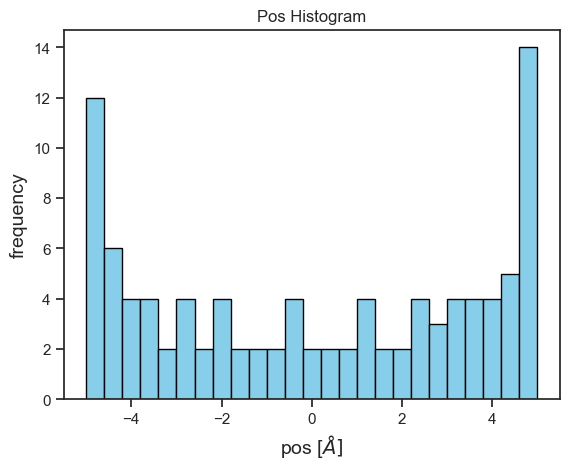

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

xyz = open("SimForFig4.xyz", 'r')
posX, posY, posZ, time = ([] for i in range(4))
count = 0
for i in xyz:
    if(count % 3 != 2):
        pass
    else:
        line = i.split()
        posX.append(float(line[1]))
        posY.append(float(line[2]))
        posZ.append(float(line[3]))
    count += 1
xyz.close()

plt.xlabel(r"pos [$\AA ]$")
plt.ylabel('frequency')
plt.title('Pos Histogram')
plt.hist(posX, 25, color='skyblue', edgecolor='black')

## figure 5

(array([12.,  6.,  5.,  3.,  4.,  3.,  3.,  3.,  3.,  2.,  3.,  3.,  3.,
         2.,  3.,  2.,  3.,  2.,  3.,  3.,  4.,  3.,  4.,  5., 13.]),
 array([-2.51750400e-11, -2.31609456e-11, -2.11468512e-11, -1.91327568e-11,
        -1.71186624e-11, -1.51045680e-11, -1.30904736e-11, -1.10763792e-11,
        -9.06228480e-12, -7.04819040e-12, -5.03409600e-12, -3.02000160e-12,
        -1.00590720e-12,  1.00818720e-12,  3.02228160e-12,  5.03637600e-12,
         7.05047040e-12,  9.06456480e-12,  1.10786592e-11,  1.30927536e-11,
         1.51068480e-11,  1.71209424e-11,  1.91350368e-11,  2.11491312e-11,
         2.31632256e-11,  2.51773200e-11]),
 <BarContainer object of 25 artists>)

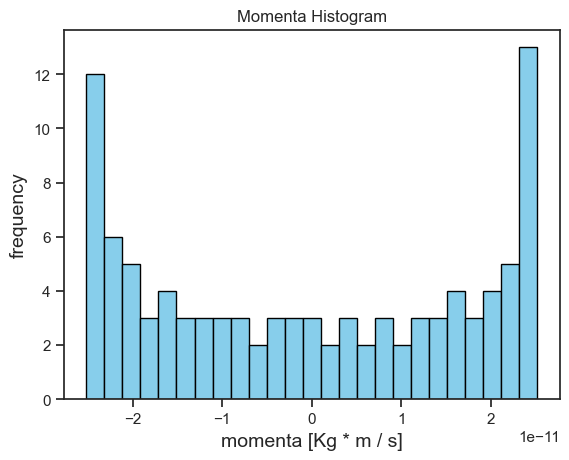

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# and for nice looking plots:
import seaborn as sns
sns.set_theme(style="ticks",rc={'axes.labelsize':14},palette='tab10')

df = pd.read_csv("simForFig5_p.log", sep='\s+')
plt.xlabel('momenta [Kg * m / s]')
plt.ylabel('frequency')
plt.title('Momenta Histogram')
plt.hist(df['pX'], 25, color='skyblue', edgecolor='black')